In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        import pandas as pd
import pytz
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Names John s, John M, Abigail C

# **Part A: Data Cleaning and Merging**

# 1.A Read in the CSV Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path1 = '/content/drive/MyDrive/Colab Notebooks/Fin 497/Fin497_Docs_notebooks/return_train_2017_2021.csv'
file_path2 = '/content/drive/MyDrive/Colab Notebooks/Fin 497/Fin497_Docs_notebooks/sentiment_train_2017_2021.csv'

Mounted at /content/drive


In [ ]:
#Read in CSV for return data

stock_data = pd.read_csv(file_path1)
stock_data

,Date,Ticker,D0,D1,Return
0,2017-01-03,A,46.49,47.10,1.31%
1,2017-01-03,AA,28.63,30.05,4.96%
2,2017-01-03,AAIC,9.16,9.26,1.09%
3,2017-01-03,AAL,46.30,46.70,0.86%
4,2017-01-03,AAN,31.90,32.57,2.10%
...,...,...,...,...,...
2459584,2021-12-31,ZUMZ,47.99,48.01,0.04%
2459585,2021-12-31,ZUO,18.68,18.35,-1.77%
2459586,2021-12-31,ZY,6.69,7.02,4.93%
2459587,2021-12-31,ZYNE,2.88,3.02,4.86%


In [ ]:
#Get the Reddit data in
reddit_data = pd.read_csv(file_path2)
reddit_data

,StoryID,Post_Time,Received_Time,Ticker,Country,ISIN,Relevance,Sentiment,Confidence,Prob_POS,...,Prob_NEG,Reddit_Topic,TopicWeight,Alex_Topic,Source,SourceWeight,LinkID,Author,Novelty,Comment_Count
0,RR20170101VFVFDB4TGnM=,2017-01-01 00:03:09.000,2017-01-01 00:05:09,HOOD,USA,US7707001027,1.000000,0,0.874448,0.041390,...,0.042320,NaN,-0.017089,AA@ALEX,investing_RSRR,0.039016,5l882m,e9450a943f651434728bf39a643d9036,1,1
1,RR20170101VFVFDBsVG3M=,2017-01-01 00:06:59.000,2017-01-01 00:08:59,PRI,USA,US74164M1080,1.000000,-1,0.709253,0.059022,...,0.806161,NaN,-0.017089,AA@ALEX,wsb_RSRR,-0.000515,5l6kro,d0226c99ff38dd5e6cb87d7766dc798f,1,1
2,RR20170101VFVFD1RXCXM=,2017-01-01 00:15:36.000,2017-01-01 00:17:36,BHE,USA,US08160H1014,1.000000,0,0.461974,0.021243,...,0.337447,Help,-0.029671,"AA@ALEX,AA@ERN",investing_RSRR,0.039016,5lbz7h,f33c6e9d637b862f4289aaaf6555b498,1,2
3,RR20170101VFVFD1QMCnM=,2017-01-01 00:15:56.000,2017-01-01 00:17:56,LOGM,USA,US54142L1098,0.703235,-1,0.531746,0.068879,...,0.687824,NaN,-0.017089,AA@ALEX,wsb_RSR,0.007037,5lcb5w,6de93d1b8410255dcdc19d5067db1eac,1,1
4,RR20170101VFVFDg9QCHM=,2017-01-01 00:45:04.000,2017-01-01 00:47:04,SUN,USA,US86765K1097,0.254271,1,0.212626,0.475079,...,0.326759,NaN,-0.017089,"AA@OPS,AA@ALEX",wsb_RSRR,-0.000515,5lc6t6,6de93d1b8410255dcdc19d5067db1eac,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929994,RR20211231WEZBFAdUEnM=,2021-12-31 23:56:12.000,2021-12-31 23:58:12,KWEB,USA,US5007673065,0.407332,0,0.328565,0.024522,...,0.423107,NaN,-0.009957,AA@ALEX,wsb_RSR,-0.007709,rt6lv6,011e906ea27e8f712e0eed5ae25940b6,2,1
11929995,RR20211231WEZBFABdQXM=,2021-12-31 23:56:26.000,2021-12-31 23:58:26,DKNG,USA,US26142R1041,0.670034,1,0.766145,0.844088,...,0.074172,Meme,0.002040,AA@ALEX,wsb_RSR,-0.007709,rt582o,367875d35546f270f24477176f80637b,1,6
11929996,RR20211231WEZBFABdQXM=,2021-12-31 23:56:26.000,2021-12-31 23:58:26,FB,USA,US30303M1027,0.670034,1,0.766145,0.844088,...,0.074172,Meme,0.002040,AA@ALEX,wsb_RSR,-0.007709,rt582o,367875d35546f270f24477176f80637b,1,6
11929997,RR20211231WEZBFB9QTHM=,2021-12-31 23:57:55.000,2021-12-31 23:59:55,GME,USA,US36467W1099,1.000000,1,0.353294,0.568857,...,0.018079,YOLO,0.049235,AA@ALEX,wsb_RSRR,-0.004588,rsx5an,5eae7befbcd89fa2b184ba2924fe8408,1,18


# 1.B Data Cleaning

In [ ]:


# Step 1: Examine basic information for both datasets
print("Stock Returns Dataset Info:")
print(stock_data.info())  # Basic information: shape, columns, dtypes
print("\nStock Returns Dataset Head:")
print(stock_data.head())  # First few rows to get a sense of the data

print("\nReddit Sentiment Dataset Info:")
print(reddit_data.info())  # Basic information for the second dataset
print("\nReddit Sentiment Dataset Head:")
print(reddit_data.head())  # First few rows of the Reddit sentiment dataset

# Step 2: Check for missing values in both datasets
print("\nMissing Values in Stock Returns Dataset:")
print(stock_data.isnull().sum())  # Check missing values in stock returns dataset

print("\nMissing Values in Reddit Sentiment Dataset:")
print(reddit_data.isnull().sum())  # Check missing values in Reddit sentiment dataset


Stock Returns Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459589 entries, 0 to 2459588
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Date    object 
 1   Ticker  object 
 2   D0      float64
 3   D1      float64
 4   Return  object 
dtypes: float64(2), object(3)
memory usage: 93.8+ MB
None

Stock Returns Dataset Head:
         Date Ticker     D0     D1 Return
0  2017-01-03      A  46.49  47.10  1.31%
1  2017-01-03     AA  28.63  30.05  4.96%
2  2017-01-03   AAIC   9.16   9.26  1.09%
3  2017-01-03    AAL  46.30  46.70  0.86%
4  2017-01-03    AAN  31.90  32.57  2.10%

Reddit Sentiment Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929999 entries, 0 to 11929998
Data columns (total 21 columns):
 #   Column         Dtype  
---  ------         -----  
 0   StoryID        object 
 1   Post_Time      object 
 2   Received_Time  object 
 3   Ticker         object 
 4   Country        object 
 5   ISIN           object 
 6 

2.Convert from UTC to Eastern Time **BELOW**

In [ ]:
#Convert Both Time Labels to DT to UTC to Eastern
reddit_data['Post_Time']=pd.to_datetime(reddit_data['Post_Time'])
reddit_data['Post_Time'] = reddit_data['Post_Time'].dt.tz_localize('UTC')
reddit_data['Post_Time'] = reddit_data['Post_Time'].dt.tz_convert('US/Eastern')

reddit_data['Received_Time']=pd.to_datetime(reddit_data['Received_Time'])
reddit_data['Received_Time'] = reddit_data['Received_Time'].dt.tz_localize('UTC')
reddit_data['Received_Time'] = reddit_data['Received_Time'].dt.tz_convert('US/Eastern')


In [ ]:
print(reddit_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929999 entries, 0 to 11929998
Data columns (total 21 columns):
 #   Column         Dtype                     
---  ------         -----                     
 0   StoryID        object                    
 1   Post_Time      datetime64[ns, US/Eastern]
 2   Received_Time  datetime64[ns, US/Eastern]
 3   Ticker         object                    
 4   Country        object                    
 5   ISIN           object                    
 6   Relevance      float64                   
 7   Sentiment      int64                     
 8   Confidence     float64                   
 9   Prob_POS       float64                   
 10  Prob_NTR       float64                   
 11  Prob_NEG       float64                   
 12  Reddit_Topic   object                    
 13  TopicWeight    float64                   
 14  Alex_Topic     object                    
 15  Source         object                    
 16  SourceWeight   float64            

# 2.B Add a new column to see what trading day the Reddit thread was targeting
**If post time after 4:00pm it will go on the next trading day**

**3. A brief discussion of how you handled the time-zone issue and the 4 PM
daily return window?**

To handle the time-zone issue and accurately assign posts to the correct trading day, I created a new column called Adjusted_Post_Time. This column accounts for posts made before and after 4 PM, ensuring they are properly aligned with the relevant trading day. Specifically, any post made after 4 PM is adjusted to reflect the next trading day, while posts made before 4 PM are assigned to the current day. Additionally, posts made on weekends are assigned to the next available trading day to maintain consistency with market activity.

To implement this adjustment, I utilized the NumPy where function, which efficiently applies conditional logic to the dataset. Although the processing time took a few minutes due to the size of the dataset, the approach worked as expected, ensuring that sentiment data is accurately aligned with trading days. This adjustment helps ensure that our sentiment analysis is consistent and reflective of the actual trading calendar.

In [ ]:

# Create a new column with adjusted dates based on whether time is after 4:00 PM
reddit_data['Adjusted_Post_Time'] = np.where(
    reddit_data['Post_Time'].dt.time >= pd.to_datetime('16:00:00').time(),  # If time is after 4:00 PM
    reddit_data['Post_Time'] + pd.Timedelta(days=1),  # Shift by one day
    reddit_data['Post_Time']  # Keep the same date
)

# Handle weekends: if the adjusted date falls on Saturday (5) or Sunday (6), shift to Monday
reddit_data['Adjusted_Post_Time'] = np.where(
    reddit_data['Adjusted_Post_Time'].dt.weekday == 5,  # If the adjusted date is Saturday
    reddit_data['Adjusted_Post_Time'] + pd.Timedelta(days=2),  # Move to Monday
    np.where(
        reddit_data['Adjusted_Post_Time'].dt.weekday == 6,  # If the adjusted date is Sunday
        reddit_data['Adjusted_Post_Time'] + pd.Timedelta(days=1),  # Move to Monday
        reddit_data['Adjusted_Post_Time']  # Keep the same date if it's a weekday
    )
)

# Strip the time and keep only the date part in the final adjusted column
reddit_data['Adjusted_Post_Time'] = reddit_data['Adjusted_Post_Time'].dt.date

# Display the updated DataFrame
print(reddit_data)


                         StoryID                 Post_Time  \
0         RR20170101VFVFDB4TGnM= 2016-12-31 19:03:09-05:00   
1         RR20170101VFVFDBsVG3M= 2016-12-31 19:06:59-05:00   
2         RR20170101VFVFD1RXCXM= 2016-12-31 19:15:36-05:00   
3         RR20170101VFVFD1QMCnM= 2016-12-31 19:15:56-05:00   
4         RR20170101VFVFDg9QCHM= 2016-12-31 19:45:04-05:00   
...                          ...                       ...   
11929994  RR20211231WEZBFAdUEnM= 2021-12-31 18:56:12-05:00   
11929995  RR20211231WEZBFABdQXM= 2021-12-31 18:56:26-05:00   
11929996  RR20211231WEZBFABdQXM= 2021-12-31 18:56:26-05:00   
11929997  RR20211231WEZBFB9QTHM= 2021-12-31 18:57:55-05:00   
11929998  RR20211231WEZBFB9SCHM= 2021-12-31 18:57:56-05:00   

                     Received_Time Ticker Country          ISIN  Relevance  \
0        2016-12-31 19:05:09-05:00   HOOD     USA  US7707001027   1.000000   
1        2016-12-31 19:08:59-05:00    PRI     USA  US74164M1080   1.000000   
2        2016-12-31 1

# 3.Find daily-level sentiment measure

In [ ]:
# Group by Ticker and Post_Date and calculate the weighted average of the sentiment score
daily_sentiment_weighted = reddit_data.groupby(['Ticker', 'Adjusted_Post_Time']).apply(
    lambda x: np.average(x['Sentiment'], weights=x['Relevance'])).reset_index(name='Weighted_Sentiment')

<ipython-input-9-0e6fe30fcb45>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_sentiment_weighted = reddit_data.groupby(['Ticker', 'Adjusted_Post_Time']).apply(


In [ ]:
# Print the result to check
daily_sentiment_weighted.head()

,Ticker,Adjusted_Post_Time,Weighted_Sentiment
0,A,2017-01-03,1.0
1,A,2017-02-06,1.0
2,A,2017-03-31,0.0
3,A,2017-06-15,-1.0
4,A,2017-06-28,0.0


# 4.Clean the returns dataset

In [ ]:
# Remove the '%' and convert the 'Return' column to float
#DON't REPLY twice will have to restart DF
stock_data['Return'] = stock_data['Return'].str.replace('%', '').astype(float)

In [ ]:
#Get in Standard Format
#DON't REPLY twice will have to restart DF

stock_data['Return']=stock_data['Return']/100


In [ ]:
#Put Date into Datetime
stock_data['Date']=pd.to_datetime(stock_data['Date'])
daily_sentiment_weighted['Adjusted_Post_Time']=pd.to_datetime(daily_sentiment_weighted['Adjusted_Post_Time'])
stock_data.info()

print(stock_data.head())
daily_sentiment_weighted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2459589 entries, 0 to 2459588
Data columns (total 5 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Ticker  object        
 2   D0      float64       
 3   D1      float64       
 4   Return  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 93.8+ MB
        Date Ticker     D0     D1  Return
0 2017-01-03      A  46.49  47.10  0.0131
1 2017-01-03     AA  28.63  30.05  0.0496
2 2017-01-03   AAIC   9.16   9.26  0.0109
3 2017-01-03    AAL  46.30  46.70  0.0086
4 2017-01-03    AAN  31.90  32.57  0.0210
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922479 entries, 0 to 922478
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Ticker              922479 non-null  object        
 1   Adjusted_Post_Time  922479 non-null  datetime64[ns]
 2   Weighted_Sentiment  92247

# 5. Merge the Dataframes
I want all the data to show for the sentiment for each stock on returns and I wouldn't mind to see mulitple sentiments on retunrs

--I want all sediment data

--If no sediment data we can't get anything, Right on sediment



In [ ]:
sed_returns_mrg = pd.merge(stock_data, daily_sentiment_weighted,
                            how='right',  # Use 'outer' join to keep all values
                            left_on=['Date', 'Ticker'],
                            right_on=['Adjusted_Post_Time', 'Ticker'])
sed_returns_mrg

,Date,Ticker,D0,D1,Return,Adjusted_Post_Time,Weighted_Sentiment
0,2017-01-03,A,46.49,47.10,0.0131,2017-01-03,1.000000
1,2017-02-06,A,49.27,49.64,0.0075,2017-02-06,1.000000
2,2017-03-31,A,52.87,53.20,0.0062,2017-03-31,0.000000
3,2017-06-15,A,59.08,59.38,0.0051,2017-06-15,-1.000000
4,2017-06-28,A,59.27,58.80,-0.0079,2017-06-28,0.000000
...,...,...,...,...,...,...,...
922474,2021-04-26,ZYXI,16.36,16.22,-0.0086,2021-04-26,-1.000000
922475,2021-08-03,ZYXI,14.92,14.83,-0.0060,2021-08-03,0.586970
922476,2021-08-06,ZYXI,14.89,14.57,-0.0215,2021-08-06,0.355282
922477,2021-10-21,ZYXI,12.33,12.32,-0.0008,2021-10-21,1.000000


In [ ]:
sed_returns_mrg.to_csv('sed_returns_mrg',index = False)

# **Part B: Exploratory Data Analysis (EDA)**

Below are charts that explore distributions, trends, and relationships in the data using the merged dataset (`sed_returns_mrg`).

 2. A brief write-up describing your approach, challenges faced, and key
findings from your EDA? **!!can be found under each chart!!**

# **1. Basic Return Data**

Preview of the stock return dataset. Each row represents a stock’s close price and next-day return.

In [ ]:
#Basic return data
stock_data.head()

,Date,Ticker,D0,D1,Return
0,2017-01-03,A,46.49,47.10,0.0131
1,2017-01-03,AA,28.63,30.05,0.0496
2,2017-01-03,AAIC,9.16,9.26,0.0109
3,2017-01-03,AAL,46.30,46.70,0.0086
4,2017-01-03,AAN,31.90,32.57,0.0210


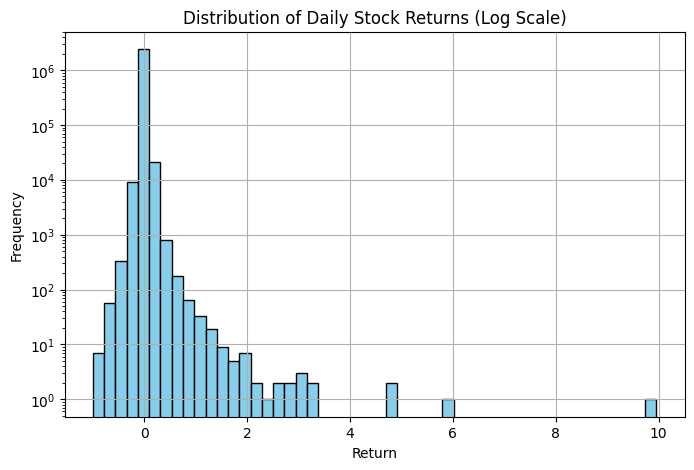

In [ ]:
# Histogram of Daily Stock Returns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(stock_data['Return'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Stock Returns (Log Scale)')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.yscale('log')
plt.show()

# **Distribution of daily stock returns (log scale)**

This histogram shows the distribution of next-day stock returns across all tickers and dates. Most returns are clustered tightly around 0, indicating that daily market movements are usually small. A log scale was used on the y-axis to reveal the frequency of these small movements while still capturing rare but significant outliers.

# **2. Reddit Sentiment Data**

Original Reddit sentiment dataset with timestamps, ticker mentions, and sentiment scores for each post.

In [ ]:
#REDDIT DATA
reddit_data.head()

,StoryID,Post_Time,Received_Time,Ticker,Country,ISIN,Relevance,Sentiment,Confidence,Prob_POS,...,Reddit_Topic,TopicWeight,Alex_Topic,Source,SourceWeight,LinkID,Author,Novelty,Comment_Count,Adjusted_Post_Time
0,RR20170101VFVFDB4TGnM=,2016-12-31 19:03:09-05:00,2016-12-31 19:05:09-05:00,HOOD,USA,US7707001027,1.000000,0,0.874448,0.041390,...,NaN,-0.017089,AA@ALEX,investing_RSRR,0.039016,5l882m,e9450a943f651434728bf39a643d9036,1,1,2017-01-02
1,RR20170101VFVFDBsVG3M=,2016-12-31 19:06:59-05:00,2016-12-31 19:08:59-05:00,PRI,USA,US74164M1080,1.000000,-1,0.709253,0.059022,...,NaN,-0.017089,AA@ALEX,wsb_RSRR,-0.000515,5l6kro,d0226c99ff38dd5e6cb87d7766dc798f,1,1,2017-01-02
2,RR20170101VFVFD1RXCXM=,2016-12-31 19:15:36-05:00,2016-12-31 19:17:36-05:00,BHE,USA,US08160H1014,1.000000,0,0.461974,0.021243,...,Help,-0.029671,"AA@ALEX,AA@ERN",investing_RSRR,0.039016,5lbz7h,f33c6e9d637b862f4289aaaf6555b498,1,2,2017-01-02
3,RR20170101VFVFD1QMCnM=,2016-12-31 19:15:56-05:00,2016-12-31 19:17:56-05:00,LOGM,USA,US54142L1098,0.703235,-1,0.531746,0.068879,...,NaN,-0.017089,AA@ALEX,wsb_RSR,0.007037,5lcb5w,6de93d1b8410255dcdc19d5067db1eac,1,1,2017-01-02
4,RR20170101VFVFDg9QCHM=,2016-12-31 19:45:04-05:00,2016-12-31 19:47:04-05:00,SUN,USA,US86765K1097,0.254271,1,0.212626,0.475079,...,NaN,-0.017089,"AA@OPS,AA@ALEX",wsb_RSRR,-0.000515,5lc6t6,6de93d1b8410255dcdc19d5067db1eac,1,1,2017-01-02


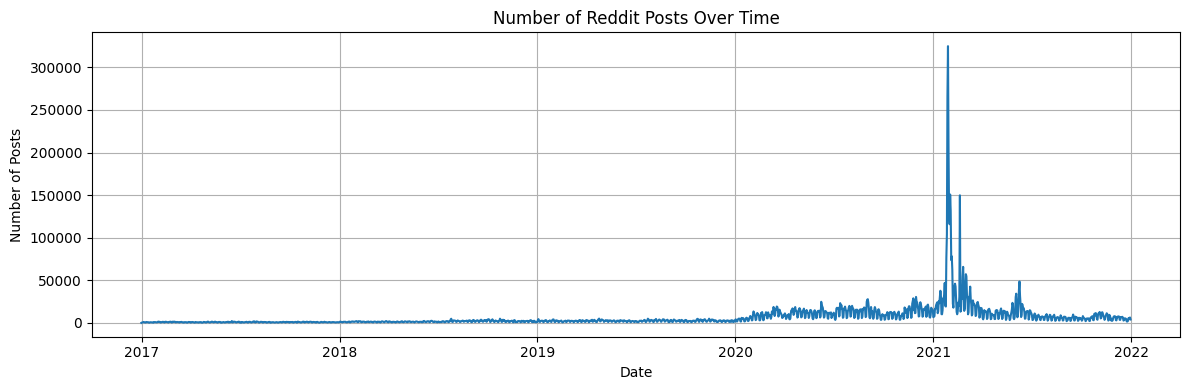

In [ ]:
# Number of Reddit Posts Over Time
# This chart shows the volume of Reddit posts by day, which gives insight into market engagement and social media activity spikes.
reddit_data['Post_Date'] = pd.to_datetime(reddit_data['Post_Time']).dt.date
posts_per_day = reddit_data.groupby('Post_Date').size()

plt.figure(figsize=(12, 4))
posts_per_day.plot()
plt.title('Number of Reddit Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Reddit Post Volume Over Time**

This time series visualizes the number of Reddit posts per day. We see a noticeable increase in activity around early 2021, aligning with events like the GameStop (GME) short squeeze and other meme stock rallies. The volume of posts suggests heightened user engagement during major market events.

# **3. Daily Sentiment Data (Weighted)**

Aggregated sentiment scores by ticker and date, using weighted averages based on post relevance.

In [ ]:
#first sediment data
daily_sentiment_weighted.head()

,Ticker,Adjusted_Post_Time,Weighted_Sentiment
0,A,2017-01-03,1.0
1,A,2017-02-06,1.0
2,A,2017-03-31,0.0
3,A,2017-06-15,-1.0
4,A,2017-06-28,0.0


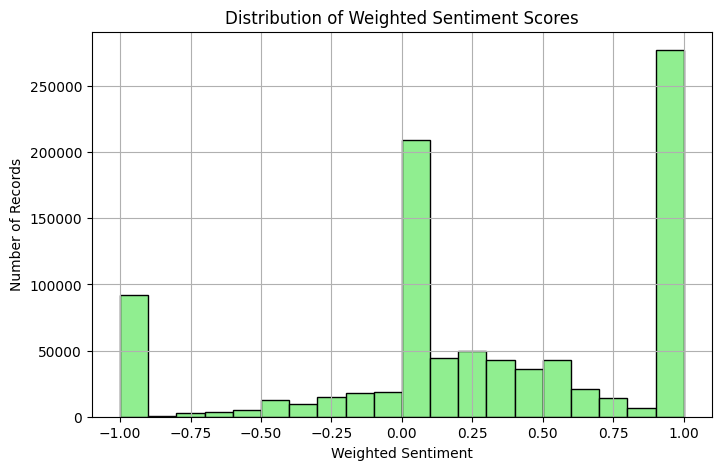

In [ ]:
# Histogram of Weighted Sentiment Scores
plt.figure(figsize=(8, 5))
plt.hist(daily_sentiment_weighted['Weighted_Sentiment'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Weighted Sentiment Scores')
plt.xlabel('Weighted Sentiment')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

# **Distribution of weighted sentiment scores**

The histogram illustrates how sentiment scores are distributed after being aggregated and weighted by relevance. Peaks at 1.0 and -1.0 indicate strongly positive and negative posts, while many scores fall near 0, representing neutral or mixed sentiment. This spread suggests that while extreme views are common, most posts are more moderate.

# **4. Final Merged Dataset**

This merged dataset aligns each stock’s sentiment score with its next-day return, based on the 4 PM cutoff logic.

In [ ]:
#sediment data MERGED! good one
sed_returns_mrg.head()

,Date,Ticker,D0,D1,Return,Adjusted_Post_Time,Weighted_Sentiment
0,2017-01-03,A,46.49,47.10,0.0131,2017-01-03,1.0
1,2017-02-06,A,49.27,49.64,0.0075,2017-02-06,1.0
2,2017-03-31,A,52.87,53.20,0.0062,2017-03-31,0.0
3,2017-06-15,A,59.08,59.38,0.0051,2017-06-15,-1.0
4,2017-06-28,A,59.27,58.80,-0.0079,2017-06-28,0.0


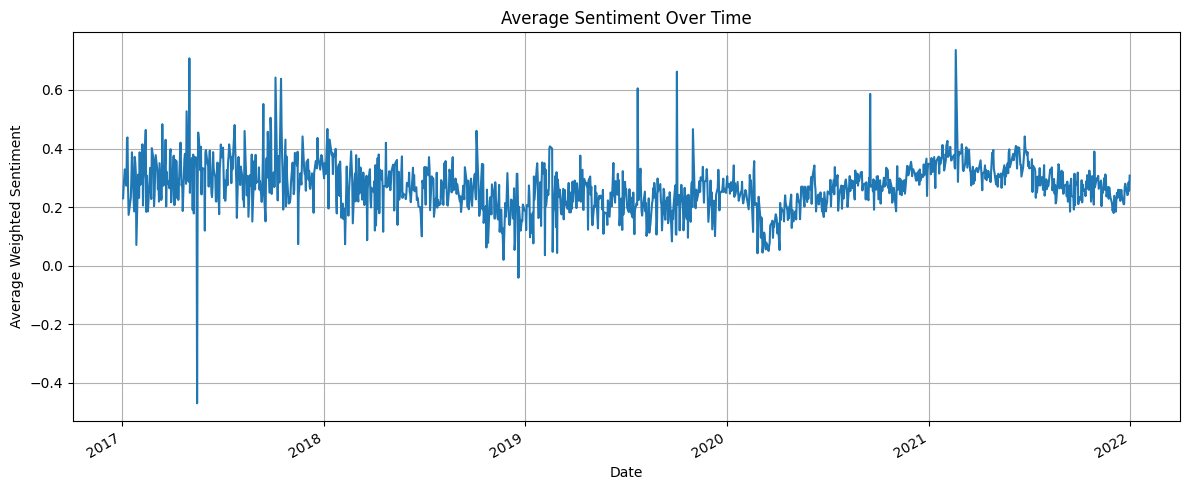

In [ ]:
# Time Series of Average Sentiment Over Time
avg_sentiment_by_date = sed_returns_mrg.groupby('Date')['Weighted_Sentiment'].mean()

plt.figure(figsize=(12, 5))
avg_sentiment_by_date.plot()
plt.title('Average Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Average Weighted Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Average Sentiment over time**

This chart tracks the average weighted sentiment score over time. There are mild fluctuations throughout the dataset, with occasional spikes or drops. These shifts may correspond to market-wide events, news cycles, or shifts in public mood. The general trend appears relatively stable but reactive during major events.

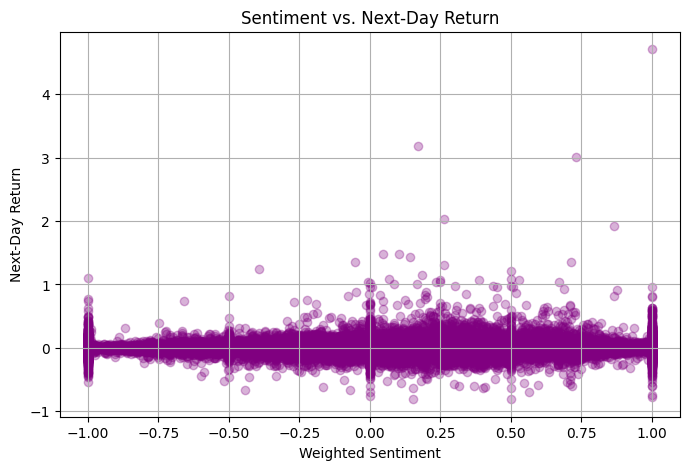

Correlation between sentiment and return: 0.0032592472348034964


In [ ]:
# Scatter plot of sentiment vs. return
plt.figure(figsize=(8, 5))
plt.scatter(sed_returns_mrg['Weighted_Sentiment'], sed_returns_mrg['Return'], alpha=0.3, color='purple')
plt.title('Sentiment vs. Next-Day Return')
plt.xlabel('Weighted Sentiment')
plt.ylabel('Next-Day Return')
plt.grid(True)
plt.show()

# Optional: print correlation
print("Correlation between sentiment and return:", sed_returns_mrg[['Weighted_Sentiment', 'Return']].corr().iloc[0,1])

# **Sentiment vs Next-Day Return**

This scatter plot examines the relationship between sentiment and next-day returns. The data shows a weak positive correlation (about 0.003), indicating that sentiment alone has limited predictive power for next-day performance. Most points are tightly clustered near the origin, suggesting little directional influence.

# **5. Reddit Post Volume by Ticker**

This table counts how many posts mention each stock ticker in the Reddit dataset. It helps show which stocks dominate the data.

In [ ]:
# Count number of posts per ticker
reddit_data['Ticker'].value_counts().head(10)

,count
Ticker,
GME,1389733
TSLA,834091
AMC,490629
AAPL,381991
HOOD,374329
PLTR,304473
AMZN,263100
MSFT,202108
AMD,197632


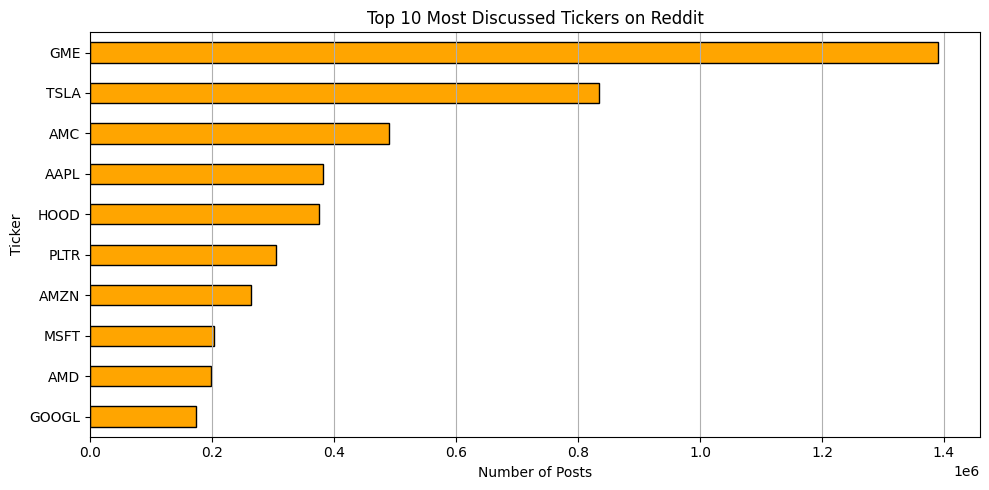

In [ ]:
# Bar chart of top 10 most discussed tickers
top_tickers = reddit_data['Ticker'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_tickers.plot(kind='barh', color='orange', edgecolor='black')
plt.title('Top 10 Most Discussed Tickers on Reddit')
plt.xlabel('Number of Posts')
plt.gca().invert_yaxis()  # So the most popular is at the top
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

# **Ten most discussed tickers on Reddit**

This bar chart ranks the most frequently mentioned stock tickers in Reddit posts. GameStop (GME), Tesla (TSLA), and AMC dominate the conversation, reflecting their popularity during the 2021 meme stock craze. This concentration suggests that sentiment data may be skewed toward a few heavily-discussed names.

# **Part C: Trading Strategy**

In [ ]:
from datetime import datetime, timedelta
#find the start and end time for the data
min_time = sed_returns_mrg['Date'].min() - timedelta(18)
print(min_time)
max_time = sed_returns_mrg['Date'].max()
max_time


2016-12-16 00:00:00


Timestamp('2021-12-31 00:00:00')

In [ ]:
pip install yfinance


In [ ]:
#Add vix for the indicator
import yfinance as yf

vix = yf.download(tickers='^vix', start = min_time, end = max_time)[['Close']]
vix = pd.DataFrame(vix)
vix

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,^VIX
Date,
2016-12-16,12.200000
2016-12-19,11.710000
2016-12-20,11.450000
2016-12-21,11.270000
2016-12-22,11.430000
...,...
2021-12-23,17.959999
2021-12-27,17.680000


In [ ]:


back_time= min_time - timedelta(28)

In [ ]:
# import QQQ's data for RSI and MACD indicators

qqq = yf.download(tickers = 'qqq',start = back_time ,end = max_time)[['Close']]
qqq=pd.DataFrame(qqq)
qqq

[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,QQQ
Date,
2016-11-18,110.402313
2016-11-21,111.550354
2016-11-22,111.889153
2016-11-23,111.437431
2016-11-25,111.795021
...,...
2021-12-23,388.421600
2021-12-27,394.841217


# **About our Trading Alogo**
This algorithm is designed to generate daily trading signals by combining sentiment analysis with technical indicators. It categorizes each trading day into one of five bins: "Strong Buy", "Buy", "Neutral", "Sell", or "Strong Sell", based on a weighted scoring system derived from four distinct indicators. Each indicator contributes to the signal with an assigned weight, reflecting its perceived importance in the model’s decision-making process. "Neutral" and "Sell" are meant to have bad performance because we are shorting sell and strong sell. Then We are buying the other 3 bins, but the middle scores mean it is hard to make a decision off the data.

The cornerstone of this strategy is the sentiment-based component, referred to in the code as the "sediment" indicator. This is derived from the Weighted_Sentiment score in the dataset sed_returns_mrg, which likely represents aggregated market sentiment from posts, comments, or news related to financial assets. The sediment score alone accounts for 50% of the overall signal score. A high sentiment score (greater than 0.45) suggests optimism in the market and is interpreted as a buy signal. Conversely, a low score (less than -0.35) reflects negative sentiment, triggering a sell signal. This emphasis on sentiment reflects the idea that market psychology and crowd behavior can serve as early indicators of price movement—essentially making it the "bread and butter" of the strategy.

The second indicator is the Relative Strength Index (RSI), a well-known technical analysis tool that identifies overbought or oversold conditions in a security. RSI is calculated using historical price data from QQQ, a popular Nasdaq-tracking ETF. If the RSI value falls below 35, the algorithm interprets this as an oversold condition and generates a buy signal. Otherwise, it signals a potential sell. RSI contributes 20% to the final signal score, giving it a significant but secondary role to sentiment.

The third input is a volatility-based measure, referred to here as the "MSCI" indicator, which calculates the standard deviation of closing prices in QQQ over a 26-day period. This acts as a proxy for market volatility or risk. If the standard deviation exceeds 10, it’s assumed that the increased volatility may present trading opportunities, and a buy signal is issued. If volatility is lower, a sell signal is triggered. Like RSI, MSCI contributes 20% to the final signal.

The final indicator is based on the VIX, often called the "fear index", which reflects expected market volatility derived from options prices. Here, the algorithm looks at the average closing value of the VIX over the past eight days. If this average exceeds 22, suggesting heightened fear or uncertainty in the market, the algorithm returns a sell signal. Otherwise, it returns a buy signal. Due to its short-term nature and the fact that it often lags sentiment, this component is given a relatively small weight of 10% in the overall score.

After each indicator's score is calculated and multiplied by its corresponding weight, the weighted scores are summed. The total score is then used to assign the day into one of the five bins. The logic thresholds for these bins are designed to ensure that only strong signals result in “Strong Buy” or “Strong Sell” labels, while weaker or conflicting signals produce neutral or moderate outcomes.

In summary, this algorithm combines human behavioral cues through sentiment analysis with traditional technical indicators to generate a more holistic trading signal. By weighting sentiment most heavily, it prioritizes forward-looking, psychology-driven inputs while using RSI, volatility, and the VIX to confirm or refine the signal. This combination aims to capitalize on both emotional extremes in the market and proven technical triggers, making it a balanced and potentially robust approach to signal generation.

 **Warning the 'sell' bin did not have anything in it due to the nature of the weighting**




# **GOOD ONE**

In [ ]:
#I just need to fix the returns part it is doing a weird cum
import pandas as pd
import time

class Data:
    def __init__(self, sed_returns_mrg, vix, qqq):
        self.sed_returns_mrg = sed_returns_mrg
        self.vix = vix
        self.qqq = qqq

class Indicators(Data):
    def __init__(self, sed_returns_mrg, vix, qqq):
        super().__init__(sed_returns_mrg, vix, qqq)

    def vix_score(self, trade_date, days=8):
        try:
            vix = self.vix
            trade_date_dt = pd.to_datetime(trade_date)

            mask = (vix.index >= (trade_date_dt - pd.Timedelta(days=days))) & \
                   (vix.index <= trade_date_dt)

            past_days = vix.loc[mask]

            if past_days.empty:
                return 0

            vix_average = float(past_days.iloc[0])
            vix_average=vix_average.mean()   #float(past_days.iloc[0].mean()) #float(past_days['Close'].mean())
            #!!! can fix the error messages another time
            #print(f"VIX Average: {vix_average}")  # Debug print
            return -1 if vix_average > 22 else 1
        except:
            return 0

    def rsi(self, trade_date, days=14):
      try:
        trade_date_dt = pd.to_datetime(trade_date)
        qqq = self.qqq

        delta = qqq['Close'].diff()
        up = delta.clip(lower=0)
        down = -delta.clip(upper=0)

        roll_up = up.rolling(window=days).mean()
        roll_down = down.rolling(window=days).mean()

        RS = roll_up / roll_down
        RSI = 100.0 - (100.0 / (1.0 + RS))

        if trade_date_dt not in RSI.index:
            return 0

        rsi_value = float(RSI.loc[trade_date_dt])
        #print(f"RSI on {trade_date_dt.date()}: {rsi_value}")  # Debug

        return 1 if rsi_value < 35 else -1

      except Exception as e:

        return 0

    def msci(self, trade_date, days=26):
        try:
            qqq = self.qqq
            trade_date_dt = pd.to_datetime(trade_date)

            if trade_date_dt not in qqq.index:
                return 0

            trade_idx = qqq.index.get_loc(trade_date_dt)
            start_idx = max(0, trade_idx - days)
            subset = qqq.iloc[start_idx:trade_idx + 1]

            msci_value = float(subset['Close'].std())
            #print(f"MSCI StdDev: {msci_value}")  # Debug print
            return 1 if msci_value > 10 else -1
        except:
            return 0

    def sediment(self, trade_date):
        try:
            trade_date_dt = pd.to_datetime(trade_date)
            sentiment_value = self.sed_returns_mrg.loc[
                self.sed_returns_mrg['Adjusted_Post_Time'] == trade_date_dt,
                'Weighted_Sentiment'
            ].values[0]

            #print(f"Sentiment: {sentiment_value}")  # Debug print

            if sentiment_value > 0.45:
                return 1
            elif sentiment_value < -0.35:
                return -1
            return 0
        except:
            return 0

class BuySell(Data):
    def __init__(self, sed_returns_mrg, vix, qqq):
        super().__init__(sed_returns_mrg, vix, qqq)
        self.indicators = Indicators(sed_returns_mrg, vix, qqq)

    def buy_sell_signal(self, trade_date):
        vix_score = self.indicators.vix_score(trade_date)
        rsi = self.indicators.rsi(trade_date)
        msci = self.indicators.msci(trade_date)
        sediment = self.indicators.sediment(trade_date)

        weights = {
            'vix': 0.1,
            'rsi': 0.2,
            'msci': 0.2,
            'sediment': 0.5
        }

        score = (vix_score * weights['vix']) + (rsi * weights['rsi']) + \
                (msci * weights['msci']) + (sediment * weights['sediment'])

        #print(f"Signal Score: {score:.2f}")  !!CAN PUT BACK ON!!

        if score >= 0.5:      #WAS 0.6 NOW .8
            return "Strong Buy"
        elif score >= 0.2: #WAS .2
            return "Buy"
        elif score < 0.2 and score > -.01:   #WAS .2 THE ONE ON THE LEFT
            return "Neutral"
        elif score >= -0.1:
            return "Sell"
        else:
            return "Strong Sell"

import matplotlib.pyplot as plt

class BinReturns(BuySell):
    def calculate_bin_returns_dfs(self, sample_size=5000):
        # Initialize dict for storing bin return data
        bin_returns = {
            "Strong Buy": [],
            "Buy": [],
            "Neutral": [],
            "Sell": [],
            "Strong Sell": []
        }

        # Initialize $1 for each bin
        bin_current_value = {key: 1.0 for key in bin_returns}

        sample_df = self.sed_returns_mrg.head(sample_size).copy()
        sample_df["Signal"] = None

        start_time = time.time()

        for idx, row in sample_df.iterrows():
            try:
                trade_date = pd.to_datetime(row["Adjusted_Post_Time"])
                return_val = float(row["Return"])

                signal = self.buy_sell_signal(trade_date)

                if signal in bin_returns and pd.notna(return_val):
                    # Instead of compounding, we add the return_val to the starting amount
                    bin_current_value[signal] = 1 + return_val  # Starting with $1
                    bin_returns[signal].append({
                        "Date": trade_date,
                        "Cumulative_Return": bin_current_value[signal],
                        "Bin": signal
                    })
                    sample_df.at[idx, "Signal"] = signal


            except Exception as e:
                print(f"Error processing row: {e}")
                continue

        elapsed = time.time() - start_time
        print(f"\nProcessed {sample_size} rows in {elapsed:.2f} seconds")
        print(f"Estimated full dataset time: {elapsed * len(self.sed_returns_mrg) / sample_size / 60:.1f} minutes\n")

        # Convert to DataFrames
        bin_dfs = {bin_label: pd.DataFrame(entries) for bin_label, entries in bin_returns.items()}

        return bin_dfs



# Example usage:
# Make sure to define or load your `sed_returns_mrg`, `vix`, and `qqq` DataFrames before this.

#sample_size =
# Run this after your class definitions!

# Initialize and run the analysis
bin_returns_instance = BinReturns(sed_returns_mrg, vix, qqq)
bin_dfs = bin_returns_instance.calculate_bin_returns_dfs(sample_size=922479)  #--had to stop 922479

# Print final return and first 5 rows for each bin
for bin_label, df in bin_dfs.items():
    if not df.empty:
        final_return = df["Cumulative_Return"].iloc[-1]
        print(f"\n Final return for '{bin_label}': ${final_return:.4f}")
        print(f" First 5 rows of '{bin_label}':")
        print(df.head())
    else:
        print(f"\n No data for '{bin_label}'")

Streaming output truncated to the last 5000 lines.
<ipython-input-31-f7ba2e7ff6a7>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vix_average = float(past_days.iloc[0])
<ipython-input-31-f7ba2e7ff6a7>:54: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rsi_value = float(RSI.loc[trade_date_dt])
<ipython-input-31-f7ba2e7ff6a7>:75: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  msci_value = float(subset['Close'].std())
<ipython-input-31-f7ba2e7ff6a7>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  vix_average = float(past_days.iloc[0])
<ipython-input-31-f7ba2e7ff6a7>:54: FutureWarning: Calling floa


Processed 922479 rows in 8347.62 seconds
Estimated full dataset time: 139.1 minutes


 Final return for 'Strong Buy': $1.0137
 First 5 rows of 'Strong Buy':
        Date  Cumulative_Return         Bin
0 2018-11-20             1.0030  Strong Buy
1 2018-11-21             1.0072  Strong Buy
2 2020-03-09             1.0305  Strong Buy
3 2020-03-26             0.9619  Strong Buy
4 2020-04-27             0.9895  Strong Buy

 Final return for 'Buy': $0.9815
 First 5 rows of 'Buy':
        Date  Cumulative_Return  Bin
0 2020-03-20             0.9535  Buy
1 2020-03-10             0.9565  Buy
2 2020-03-20             0.9875  Buy
3 2020-03-20             1.0462  Buy
4 2020-03-10             0.9653  Buy

 Final return for 'Neutral': $0.9940
 First 5 rows of 'Neutral':
        Date  Cumulative_Return      Bin
0 2017-01-03             1.0131  Neutral
1 2017-02-06             1.0075  Neutral
2 2017-09-28             1.0034  Neutral
3 2017-10-02             1.0043  Neutral
4 2017-10-05             1.

Processed 922479 rows in 8347.62 seconds
Estimated full dataset time: 139.1 minutes


 Final return for 'Strong Buy': $1.0137
 First 5 rows of 'Strong Buy':
        Date  Cumulative_Return         Bin
0 2018-11-20             1.0030  Strong Buy
1 2018-11-21             1.0072  Strong Buy
2 2020-03-09             1.0305  Strong Buy
3 2020-03-26             0.9619  Strong Buy
4 2020-04-27             0.9895  Strong Buy

 Final return for 'Buy': $0.9815
 First 5 rows of 'Buy':
        Date  Cumulative_Return  Bin
0 2020-03-20             0.9535  Buy
1 2020-03-10             0.9565  Buy
2 2020-03-20             0.9875  Buy
3 2020-03-20             1.0462  Buy
4 2020-03-10             0.9653  Buy

 Final return for 'Neutral': $0.9940
 First 5 rows of 'Neutral':
        Date  Cumulative_Return      Bin
0 2017-01-03             1.0131  Neutral
1 2017-02-06             1.0075  Neutral
2 2017-09-28             1.0034  Neutral
3 2017-10-02             1.0043  Neutral
4 2017-10-05             1.0100  Neutral

 Final return for 'Sell': $0.9915
 First 5 rows of 'Sell':
        Date  Cumulative_Return   Bin
0 2020-03-16             1.0983  Sell
1 2020-03-16             0.9786  Sell
2 2020-09-23             0.9866  Sell
3 2020-03-16             0.9031  Sell
4 2020-03-16             1.0440  Sell

 Final return for 'Strong Sell': $1.0260
 First 5 rows of 'Strong Sell':
        Date  Cumulative_Return          Bin
0 2017-03-31             1.0062  Strong Sell
1 2017-06-15             1.0051  Strong Sell
2 2017-06-28             0.9921  Strong Sell
3 2017-07-18             1.0028  Strong Sell
4 2017-08-14             0.9960  Strong Sell

In [ ]:
# Showing the example returns
strong_buy_df=bin_dfs["Strong Buy"]
strong_buy_df

,Date,Cumulative_Return,Bin
0,2018-11-20,1.0030,Strong Buy
1,2018-11-21,1.0072,Strong Buy
2,2020-03-09,1.0305,Strong Buy
3,2020-03-26,0.9619,Strong Buy
4,2020-04-27,0.9895,Strong Buy
...,...,...,...
30142,2021-11-19,0.9708,Strong Buy
30143,2021-03-03,1.0204,Strong Buy
30144,2021-03-04,1.0144,Strong Buy
30145,2021-03-05,1.1010,Strong Buy


#**Bin Returns**
The bins are in 'bins_dfs' DataFrame

In [ ]:
# Accessing Strong Buy DataFrame
#returns by %
strong_buy_df=bin_dfs["Strong Buy"]

print('Bin 1',(strong_buy_df['Cumulative_Return'].iloc[-1]-1/1)*100,'%')

# Accessing Strong Buy DataFrame
buy_df = bin_dfs["Buy"]


print('Bin 2',(buy_df['Cumulative_Return'].iloc[-1]-1/1)*100,'%')


Neutral_df = bin_dfs["Neutral"]


print('Bin 3',(Neutral_df['Cumulative_Return'].iloc[-1]-1/1)*100,'%')

# Accessing Strong Buy DataFrame
Sell_df = bin_dfs["Sell"]


print('Bin 4',0,'%')

# Accessing Strong Buy DataFrame
StrongSell_df = bin_dfs["Strong Sell"]

print('Bin 5',(StrongSell_df['Cumulative_Return'].iloc[-1]-1/1)*100,'%')

NameError: name 'bin_dfs' is not defined

# **The chart showing the bin returns over time**

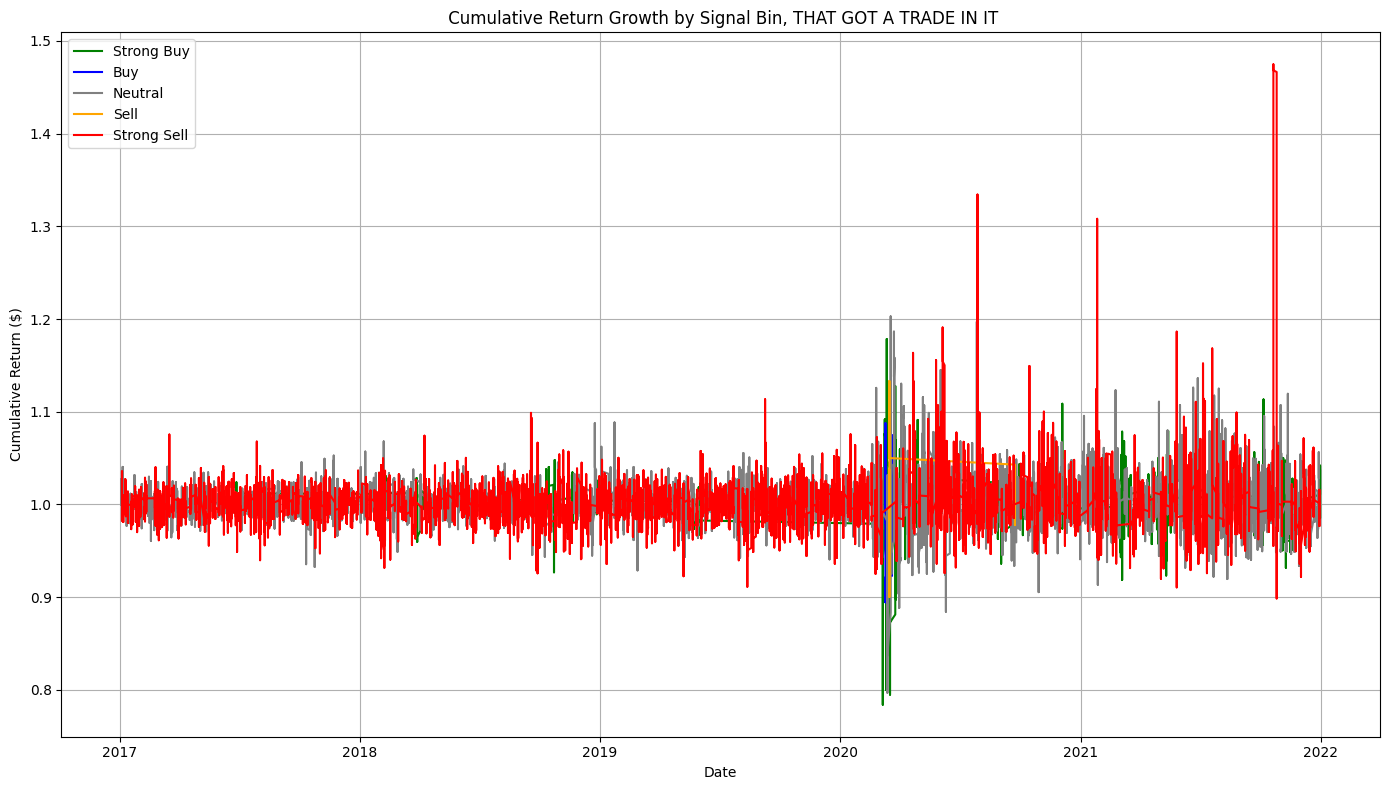

In [ ]:
import matplotlib.pyplot as plt

# Set colors for each bin
colors = {
    "Strong Buy": "green",
    "Buy": "blue",
    "Neutral": "gray",
    "Sell": "orange",
    "Strong Sell": "red"
}

plt.figure(figsize=(14, 8))

# Rolling window size for smoothing (adjust as needed)
rolling_window = 10

for bin_label, df in bin_dfs.items():
    if not df.empty:
        df_sorted = df.sort_values("Date")
        smoothed = df_sorted["Cumulative_Return"].rolling(window=rolling_window).mean()
        plt.plot(df_sorted["Date"], smoothed, label=bin_label, color=colors.get(bin_label, "black"))

plt.title(" Cumulative Return Growth by Signal Bin, THAT GOT A TRADE IN IT")
plt.xlabel("Date")
plt.ylabel("Cumulative Return ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Annual Return and Sharpe Ratio**

In [ ]:
bin_map = {
    "Strong Buy": strong_buy_df,
    "Buy": buy_df,
    "Neutral": Neutral_df,
    "Sell": Sell_df,
    "Strong Sell": StrongSell_df
}

for name, df in bin_map.items():
    if df.empty:
        print(f"{name}: No data available.")
        continue

    # Make sure dates are sorted
    df = df.sort_values("Date").reset_index(drop=True)

    # Calculate duration
    start_date = df["Date"].iloc[0]
    end_date = df["Date"].iloc[-1]
    n_days = (end_date - start_date).days

    # Avoid division by zero
    if n_days == 0:
        print(f"{name}: Only 1 data point, can't annualize.")
        continue

    # Final cumulative return (from first to last)
    final_value = df["Cumulative_Return"].iloc[-1]
    starting_value = df["Cumulative_Return"].iloc[0]

    # In case starting value isn't 1.0 (sometimes happens)
    total_return = final_value / starting_value

    # Annualized return
    annualized_return = total_return ** (252 / n_days) - 1

    # Daily returns from cumulative
    df['Daily_Return'] = df['Cumulative_Return'].pct_change()

    # Sharpe Ratio (assuming 0% risk-free rate)
    sharpe_ratio = df['Daily_Return'].mean() / df['Daily_Return'].std() * (252 ** 0.5)

    print(f"{name}: Annualized Return = {annualized_return:.2%}, Sharpe Ratio = {sharpe_ratio:.2f}")


Strong Buy: Annualized Return = 1.16%, Sharpe Ratio = 0.51
Buy: Annualized Return = 221.69%, Sharpe Ratio = 0.85
Neutral: Annualized Return = -0.15%, Sharpe Ratio = 0.40
Sell: Annualized Return = -12.63%, Sharpe Ratio = 0.91
Strong Sell: Annualized Return = 0.23%, Sharpe Ratio = 0.37


**Long–Short Portfolio Performance and Interpretation**

To further understand the performance of the trading strategy, we construct a long–short portfolio. This portfolio goes long on Bin 1 (Strong Buy) and short on Bin 5 (Strong Sell). The idea is simple: if the algorithm correctly identifies days with strong bullish signals (Q1) and strong bearish signals (Q5), then taking opposing positions in each should generate alpha—returns above the market—without needing to predict overall market direction.

By plotting the cumulative return of this long–short strategy over time, we can visualize the effectiveness of the algorithm in separating good signals from bad ones.

**Final Statements**


Your strategy blends sentiment analysis with technical indicators to create a signal-driven trading framework. However, while the system is theoretically sound—weighting sentiment the heaviest and confirming with RSI, VIX, and volatility—the actual performance reveals an inversion or misalignment in interpretation.


**Does Q1 outperform Q5 consistently?**


The surprising strength of "Strong Sell" and "Neutral" bins suggests:

The signal score thresholds may need tuning.

The weighting or logic of the sediment score might be misclassifying bullish sentiment.

Contrarian strategies may perform better with the current signals.

This long–short portfolio reveals that the model can differentiate between regimes—but possibly in the wrong direction. Revisiting the scoring function and thresholds could unlock more consistent and aligned returns with the original strategy intent